<a href="https://colab.research.google.com/github/dapsavoie/tz_water_well_prediction/blob/master/Random_Forest_77_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df_values = pd.read_csv('/content/drive/My Drive/tz_water_well_data/training_set_labels.csv')
df_labels = pd.read_csv('/content/drive/My Drive/tz_water_well_data/training_set_values.csv')
df_test_set = pd.read_csv('/content/drive/My Drive/tz_water_well_data/df_test_set.csv')
df_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# EDA

In [37]:
df_values.shape , df_labels.shape

((59400, 40), (59400, 2))

In [38]:
df_labels.dtypes

id               int64
status_group    object
dtype: object

In [39]:
df_labels.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [9]:
df_values.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [41]:
df_values.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [0]:
#df_values['id'] = df_values['id'].astype('int')

#df_labels['id'] = df_values['id'].astype('int')

# Merge predictive categories to df_values by id

In [34]:
merged = pd.merge(df_labels, df_values, on='id', how='left')
merged.head()

,id,amount_tsh_x,date_recorded_x,funder_x,gps_height_x,installer_x,longitude_x,latitude_x,wpt_name_x,num_private_x,basin_x,subvillage_x,region_x,region_code_x,district_code_x,lga_x,ward_x,population_x,public_meeting_x,recorded_by_x,scheme_management_x,scheme_name_x,permit_x,construction_year_x,extraction_type_x,extraction_type_group_x,extraction_type_class_x,management_x,management_group_x,payment_x,payment_type_x,water_quality_x,quality_group_x,quantity_x,quantity_group_x,source_x,source_type_x,source_class_x,waterpoint_type_x,waterpoint_type_group_x,amount_tsh_y,date_recorded_y,funder_y,gps_height_y,installer_y,longitude_y,latitude_y,wpt_name_y,num_private_y,basin_y,subvillage_y,region_y,region_code_y,district_code_y,lga_y,ward_y,population_y,public_meeting_y,recorded_by_y,scheme_management_y,scheme_name_y,permit_y,construction_year_y,extraction_type_y,extraction_type_group_y,extraction_type_class_y,management_y,management_group_y,payment_y,payment_type_y,water_quality_y,quality_group_y,quantity_y,quantity_group_y,source_y,source_type_y,source_class_y,waterpoint_type_y,waterpoint_type_group_y
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
merged['date_recorded'] = pd.to_datetime(merged['date_recorded'])
merged['construction_year'] = pd.to_datetime(merged['construction_year'])

merged[['date_recorded', 'construction_year']].dtypes

KeyError: ignored

In [0]:
merged.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,1970-01-01 00:00:00.000002012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,functional
1,8776,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,1970-01-01 00:00:00.000002000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,1970-01-01 00:00:00.000002010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,functional
3,67743,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1970-01-01 00:00:00.000001987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional
4,19728,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,1970-01-01 00:00:00.000002000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [0]:
y_hist = merged['status_group'].astype('category')
y_hist.head()

0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: category
Categories (3, object): [functional, functional needs repair, non functional]

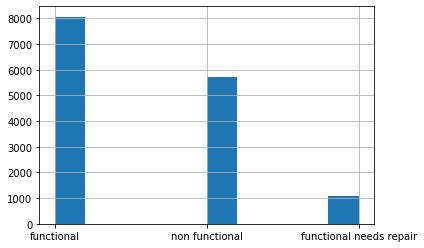

In [0]:
merged['status_group'].hist()

# 3 Predictive categories
    ## Functional
    ## Non functional
    ## functional needs repair

# Lets start with KNN

In [0]:
df = pd.DataFrame(merged)

In [0]:
df.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year        datetime64[ns]
extraction_type                  object


In [0]:
df['status_group'].value_counts()

functional                 8065
non functional             5708
functional needs repair    1077
Name: status_group, dtype: int64

In [0]:
df.groupby('installer')['id'].nunique()

installer
0                 203
AAR                 1
ABASIA              5
ABDUL               1
AC                  3
                 ... 
wanan              10
wananchi           32
water board         1
wizara ya maji      1
world               1
Name: id, Length: 1091, dtype: int64

# Created a new datframe for dummy variables 

In [0]:
# Selecting all columns that are objects

cat = pd.DataFrame(merged.select_dtypes(include=['object']))
pred = cat

In [0]:
pred.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,Dmdd,DMDD,Dinamu Secondary School,Internal,Magoma,Manyara,Mbulu,Bashay,True,GeoData Consultants Ltd,Parastatal,NaN,True,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,Government Of Tanzania,DWE,Kimnyak,Pangani,Kimnyak,Arusha,Arusha Rural,Kimnyaki,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,NaN,NaN,Puma Secondary,Internal,Msatu,Singida,Singida Rural,Puma,True,GeoData Consultants Ltd,VWC,P,NaN,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,Finn Water,FINN WATER,Kwa Mzee Pange,Ruvuma / Southern Coast,Kipindimbi,Lindi,Liwale,Mkutano,NaN,GeoData Consultants Ltd,VWC,NaN,True,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,Bruder,BRUDER,Kwa Mzee Turuka,Ruvuma / Southern Coast,Losonga,Ruvuma,Mbinga,Mbinga Urban,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [1]:
pred = merged[['status_group','region', 
                    'water_quality',
                    'waterpoint_type_group',
                    'source_type',
                    'source_class']]

NameError: ignored

# Create Dummy Variables after selecting features

In [0]:
pred_dummies = pd.get_dummies(data=pred,
                    columns=['region', 
                    'water_quality',
                    'waterpoint_type_group',
                    'source_type',
                    'source_class'])

In [0]:
pred_dummies.head()

In [0]:
df_train, df_test = train_test_split(pred_dummies, test_size=0.30)

In [0]:
df_train.shape, df_test.shape

In [0]:
# Selecting our columns

In [0]:
y = df_train['status_group']
x = df_train.drop(columns = 'status_group', inplace=True)

#y.shape, x.shape

In [0]:
# We aren't turning the hyperparameters

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x, y)

In [0]:
random_point = df_test.sample(n=1)
random_point

In [0]:
test_predictions = knn.predict(x)

In [0]:
x.shape, y.shape

In [0]:
results=pd.concat([y,pd.DataFrame(data=knn.predict(x),index=y.index.values.tolist())],axis =1).rename(columns={"Status":"Group",0:"Prediction"})

In [0]:
results.head()

# model.score low accuracy

In [0]:
test_x= df_test.drop(columns='status_group')

In [0]:
knn.score(test_x, df_test['status_group'])

In [0]:
cm = confusion_matrix(results['status_group'], results['Prediction'])
cm

# Try a regression

In [0]:
import seaborn as sns 

import statsmodels.api as sm
import statsmodels.formula.api as smf


import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn import linear_model
from sklearn.model_selection import train_test_split 

import scipy.stats as stats

import math

In [0]:
x = pd.DataFrame(dummies_status[['amount_tsh', 'population','gps_height']])
y = pd.DataFrame(dummies_status['status_group_functional'])

y.head()

In [0]:
reg=linear_model.LinearRegression()

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=4)

reg.fit(x_train, y_train)

pred = reg.predict(x_test) #make predictions

x2 = sm.add_constant(x)

est=sm.OLS(y, x2)

est2=est.fit()

print(est2.summary())

# Random Tree Forests

In [0]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc

In [30]:
df_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [0]:
target = df_labels['status_group']
#predictors = df_values.drop(columns='id')

In [0]:
df_values.columns
predictors = df_values.drop(columns=[ 'date_recorded', 'longitude', 'latitude', 'recorded_by', 'permit',  'scheme_management', 'scheme_name', 'permit', 'funder', 
                            'installer', 'subvillage', 'public_meeting'])

In [33]:
data = pd.get_dummies(predictors)
data.head()

,id,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,wpt_name_24,wpt_name_A Kulwa,wpt_name_A Saidi,wpt_name_Abass,wpt_name_Abbas,wpt_name_Abdala Hamisi,wpt_name_Abdala Mwandute,wpt_name_Abdalaa,wpt_name_Abdalah,wpt_name_Abdalah Ali,wpt_name_Abdalah Mashaka,wpt_name_Abdalah Miliki,wpt_name_Abdalah Mwakibona,wpt_name_Abdalah Shombe,wpt_name_Abdalamani Mussa,wpt_name_Abdalla Nambambili,wpt_name_Abdallah Chingi,wpt_name_Abdallah Miwani,wpt_name_Abdallah Mponzi,wpt_name_Abdallah Nassor Msabaha,wpt_name_Abdallah Nassoro,wpt_name_Abdi,wpt_name_Abdieri Serakike,wpt_name_Abdu,wpt_name_Abdul,wpt_name_Abdul Sharif,wpt_name_Abdul Swalehe,wpt_name_Abedi Taliwa,wpt_name_Abel Mgaya,wpt_name_Abel Mwalongo,wpt_name_Abel Nasari,wpt_name_Abel Tewene,...,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,0,11,5,109,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,8776,0.0,1399,0,20,2,280,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686,0,21,4,250,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,0,90,63,58,1986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,0,0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [34]:
data = data.set_index('id')
data

,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,wpt_name_24,wpt_name_A Kulwa,wpt_name_A Saidi,wpt_name_Abass,wpt_name_Abbas,wpt_name_Abdala Hamisi,wpt_name_Abdala Mwandute,wpt_name_Abdalaa,wpt_name_Abdalah,wpt_name_Abdalah Ali,wpt_name_Abdalah Mashaka,wpt_name_Abdalah Miliki,wpt_name_Abdalah Mwakibona,wpt_name_Abdalah Shombe,wpt_name_Abdalamani Mussa,wpt_name_Abdalla Nambambili,wpt_name_Abdallah Chingi,wpt_name_Abdallah Miwani,wpt_name_Abdallah Mponzi,wpt_name_Abdallah Nassor Msabaha,wpt_name_Abdallah Nassoro,wpt_name_Abdi,wpt_name_Abdieri Serakike,wpt_name_Abdu,wpt_name_Abdul,wpt_name_Abdul Sharif,wpt_name_Abdul Swalehe,wpt_name_Abedi Taliwa,wpt_name_Abel Mgaya,wpt_name_Abel Mwalongo,wpt_name_Abel Nasari,wpt_name_Abel Tewene,wpt_name_Abelrunyagu,...,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,0,11,5,109,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8776,0.0,1399,0,20,2,280,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
34310,25.0,686,0,21,4,250,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
67743,0.0,263,0,90,63,58,1986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
19728,0.0,0,0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,0,3,5,125,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
27263,4700.0,1212,0,11,4,56,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
37057,0.0,0,0,12,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [0]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=123)

In [36]:
target_test

36801                 functional
14960             non functional
58264    functional needs repair
31137             non functional
5115                  functional
                  ...           
41610                 functional
13169    functional needs repair
24620                 functional
57960                 functional
56271             non functional
Name: status_group, Length: 14850, dtype: object

In [11]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
test_predictions = tree_clf.predict(data_test)
test_predictions

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [50]:
test_predictions

,0
0,functional
1,functional
2,functional
3,non functional
4,functional
...,...
14845,functional
14846,functional
14847,functional
14848,functional


In [13]:
# Calculate accuracy 
acc = accuracy_score(target_test,test_predictions) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :71.003367003367


In [47]:
target_test['status_group_predicted'] = test_predictions
target_test

36801                                                            functional
14960                                                        non functional
58264                                               functional needs repair
31137                                                        non functional
5115                                                             functional
                                                ...                        
13169                                               functional needs repair
24620                                                            functional
57960                                                            functional
56271                                                        non functional
status_group_predicted                        0
0          functional
1 ...
Name: status_group, Length: 14851, dtype: object

In [0]:
df_out = pd.merge(df_test_set ,target_test[[0]],how = 'left',left_index = True, right_index = True)

In [52]:
df_out

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,NaN
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,NaN
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,NaN
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,NaN
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,NaN


# Instantiate and fit a decision tree classifier 

In [17]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
tree_clf2.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [34]:
test_predictions2 = tree_clf2.predict(data_test)
test_predictions2

array(['functional', 'non functional', 'non functional', ...,
       'functional', 'functional', 'functional'], dtype=object)

In [41]:
# Calculate accuracy 
acc = accuracy_score(target_test,test_predictions2)
print('Accuracy is :{0}'.format(acc))

Accuracy is :0.7703703703703704


In [58]:
data_test

,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,wpt_name_24,wpt_name_A Kulwa,wpt_name_A Saidi,wpt_name_Abass,wpt_name_Abbas,wpt_name_Abdala Hamisi,wpt_name_Abdala Mwandute,wpt_name_Abdalaa,wpt_name_Abdalah,wpt_name_Abdalah Ali,wpt_name_Abdalah Mashaka,wpt_name_Abdalah Miliki,wpt_name_Abdalah Mwakibona,wpt_name_Abdalah Shombe,wpt_name_Abdalamani Mussa,wpt_name_Abdalla Nambambili,wpt_name_Abdallah Chingi,wpt_name_Abdallah Miwani,wpt_name_Abdallah Mponzi,wpt_name_Abdallah Nassor Msabaha,wpt_name_Abdallah Nassoro,wpt_name_Abdi,wpt_name_Abdieri Serakike,wpt_name_Abdu,wpt_name_Abdul,wpt_name_Abdul Sharif,wpt_name_Abdul Swalehe,wpt_name_Abedi Taliwa,wpt_name_Abel Mgaya,wpt_name_Abel Mwalongo,wpt_name_Abel Nasari,wpt_name_Abel Tewene,wpt_name_Abelrunyagu,...,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
36801,0.0,1373,0,16,1,360,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
14960,0.0,1120,0,2,7,120,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
58264,250.0,1409,0,16,2,370,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
31137,0.0,306,0,90,33,1,1980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5115,0.0,0,0,18,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41610,20.0,1285,0,13,3,2500,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
13169,0.0,0,0,12,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
24620,1000.0,1611,0,11,1,1,1983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
57960,500.0,1491,0,3,2,80,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
